<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-4:-Batch-processing" data-toc-modified-id="Chapter-4:-Batch-processing-1">Chapter 4: Batch processing</a></span><ul class="toc-item"><li><span><a href="#How-does-the-shell-store-information?" data-toc-modified-id="How-does-the-shell-store-information?-1.1">How does the shell store information?</a></span></li><li><span><a href="#How-can-I-repeat-a-command-many-times?" data-toc-modified-id="How-can-I-repeat-a-command-many-times?-1.2">How can I repeat a command many times?</a></span></li><li><span><a href="#How-can-I-repeat-a-command-once-for-each-file?" data-toc-modified-id="How-can-I-repeat-a-command-once-for-each-file?-1.3">How can I repeat a command once for each file?</a></span></li><li><span><a href="#How-can-I-record-the-names-of-a-set-of-files?" data-toc-modified-id="How-can-I-record-the-names-of-a-set-of-files?-1.4">How can I record the names of a set of files?</a></span></li><li><span><a href="#A-variable's-name-versus-its-value" data-toc-modified-id="A-variable's-name-versus-its-value-1.5">A variable's name versus its value</a></span></li><li><span><a href="#How-can-I-run-many-commands-in-a-single-loop?" data-toc-modified-id="How-can-I-run-many-commands-in-a-single-loop?-1.6">How can I run many commands in a single loop?</a></span></li><li><span><a href="#How-can-I-do-many-things-in-a-single-loop?" data-toc-modified-id="How-can-I-do-many-things-in-a-single-loop?-1.7">How can I do many things in a single loop?</a></span></li></ul></li></ul></div>

# Chapter 4: Batch processing

## How does the shell store information?

Like other programs, the shell stores information in variables. 

Some of these, called **environment variables**, are available all the time. 

Environment variables' names are conventionally **written in upper case**, and a few of the more commonly-used ones are shown below.

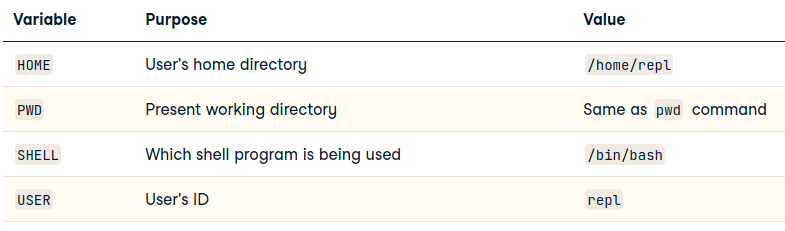

## How can I repeat a command many times?
Shell variables are also used in loops, which repeat commands many times. If we run this command:

In [2]:
# If you write a for loop in one line, use ;
for filetype in jpg gif png; do echo $filetype; done

jpg
gif
png


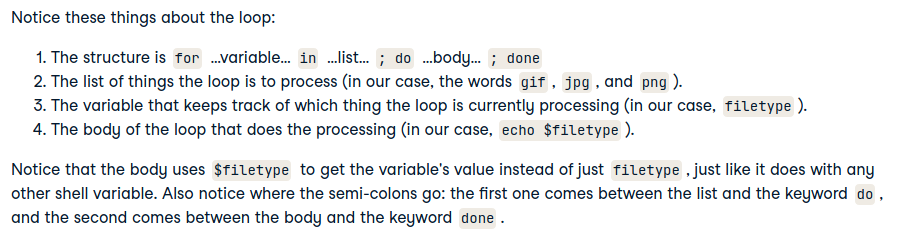

In [3]:
for filetype2 in docx odt pdf; do echo "This file is a $filetype2"; done

This file is a docx
This file is a odt
This file is a pdf


## How can I repeat a command once for each file?

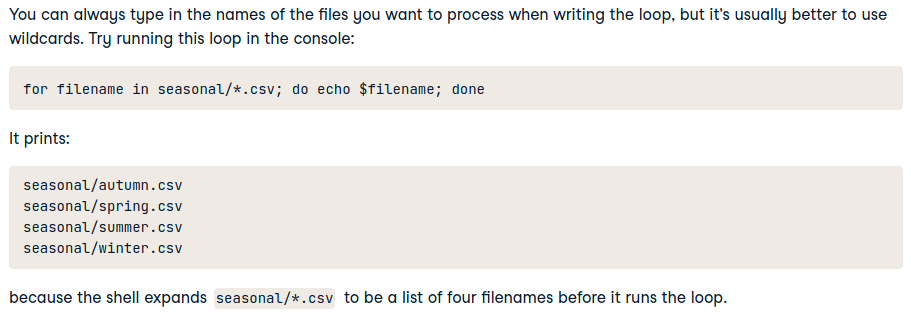

In [4]:
for filename in ../data/*.csv; do echo $filename; done

../data/everyone.csv
../data/new_hires.csv
../data/soccer_scores.csv
../data/soccer_scores_edited.csv


Modify the wildcard expression to `folder/*` so that the loop prints the names of the files in the directory regardless of what suffix they do or don't have. Please use filename as the name of your loop variable.

In [5]:
for filename in ../data/logs/*; do echo $filename; done

../data/logs/good_logs
../data/logs/log1.txt
../data/logs/log.csv
../data/logs/logdays.txt


## How can I record the names of a set of files?

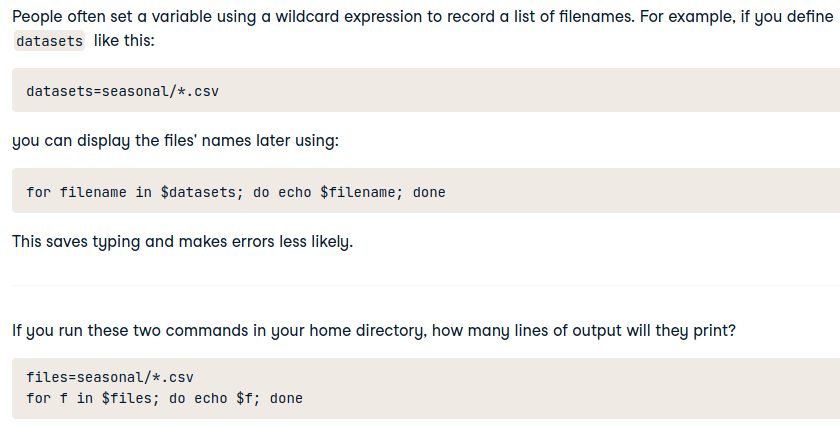

Four: the names of all four seasonal data files.

In [12]:
files=$(ls ../data/logs/*.csv)

for f in $files; do echo $f; done

../data/logs/log.csv


In [6]:
# doesn't work like in the example for me, perhaps due to the jupyter notebook
# try in the terminal later
datasets=$(ls ../data/*.csv)

In [9]:
for filename in $datasets; do echo $filename; done

../data/everyone.csv
../data/new_hires.csv
../data/soccer_scores.csv
../data/soccer_scores_edited.csv


In [10]:
datasets=$(ls ../data/hire_data/*)

In [11]:
# I wan to count the number of files in that directory

# starting counter
count=0

# looping through the files in the variable
for file in $datasets; do ((count=count+1)); done

echo "There are $count files in that directory"

There are 202 files in that directory


## A variable's name versus its value

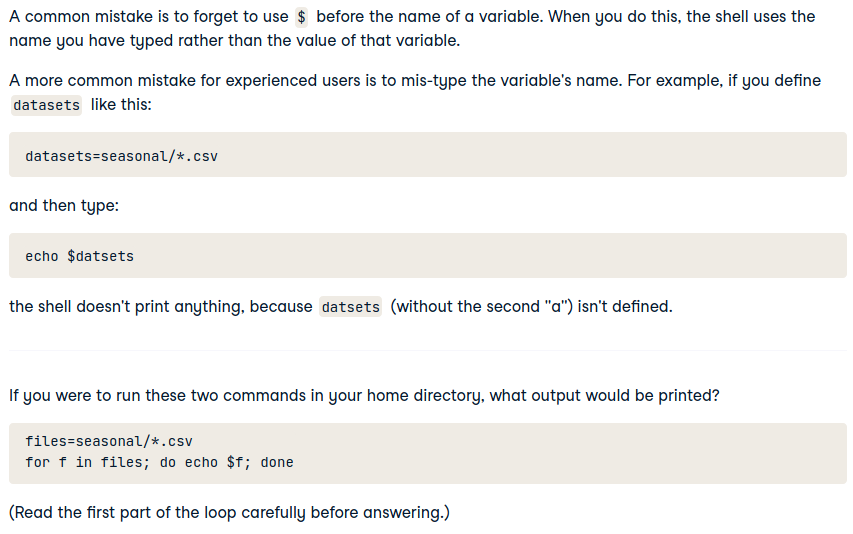

In [13]:
files=$(ls ../data/logs/*.csv)

for f in files; do echo $f; done

files


The loop uses `files` instead of `$files`, so the list consists of the word "files".

## How can I run many commands in a single loop?

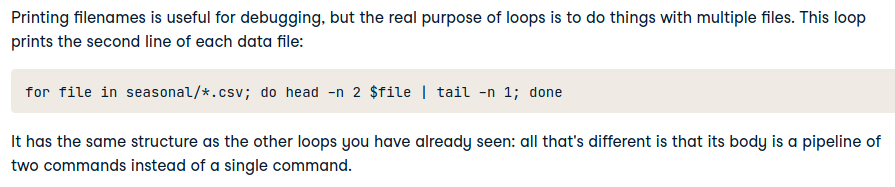

In [18]:
# this print the 2 first lines of each file
#for file in ../data/model_out_ex/tree_models/*.csv; do head -n 2 $file; done

# from the 2 first lines of each file | print the last n=1 lines (last line = second line of each file)
# so, at the end we will print the second line of each file
for file in ../data/model_out_ex/tree_models/*.csv; do head -n 2 $file | tail -n 1; done

GBM,55,3,239
GBM,85,5,30
GBM,47,7,331
Random Forest,76,8,165
XGBoost,43,7,214
GBM,22,3,324
GBM,74,8,321
XGBoost,95,8,264
GBM,64,3,85
GBM,40,8,137
Random Forest,54,6,122
Random Forest,59,3,156
GBM,70,4,145
GBM,28,8,57
XGBoost,57,8,152
XGBoost,92,3,185
Random Forest,55,6,197
GBM,45,8,121
Random Forest,92,6,110
XGBoost,60,4,293
GBM,28,7,267
GBM,86,3,142
Random Forest,43,7,219
GBM,28,5,317
XGBoost,87,5,131
GBM,88,8,138
Random Forest,79,5,180


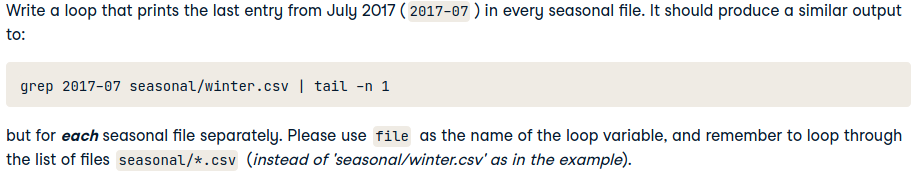

In my case, I'll write a loop that prints the last entry that has "Python Developer" in every `.csv` file of the directory `hire_data/ex/`.

In [26]:
cat ../data/hire_data/new_hiresaa.csv

﻿Country,City,Job Name,Salary
Afghanistan,Kabul,Javascript Developer,158003
Akrotiri and Dhekelia,Episkopi Cantonment,Python Developer,194640
Albania,Tirana,Data Scientist,187506
Algeria,Algiers,Javascript Developer,165451


In [22]:
grep -c "Python Developer" ../data/hire_data/new_hiresaa.csv

1


In [23]:
for file in ../data/hire_data/ex/*.csv; do grep "Python Developer" $file | tail -n 1; done

Akrotiri and Dhekelia,Episkopi Cantonment,Python Developer,194640
Akrotiri and Dhekelia,Episkopi Cantonment,Python Developer,194640
Akrotiri and Dhekelia,Episkopi Cantonment,Python Developer,194640


In [25]:
for file in ../data/hire_data/ex/*.csv; do grep "Data Scientist" $file | tail -n 1; done

Albania,Tirana,Data Scientist,187506
Albania,Tirana,Data Scientist,187506
Albania,Tirana,Data Scientist,187506


## How can I do many things in a single loop?

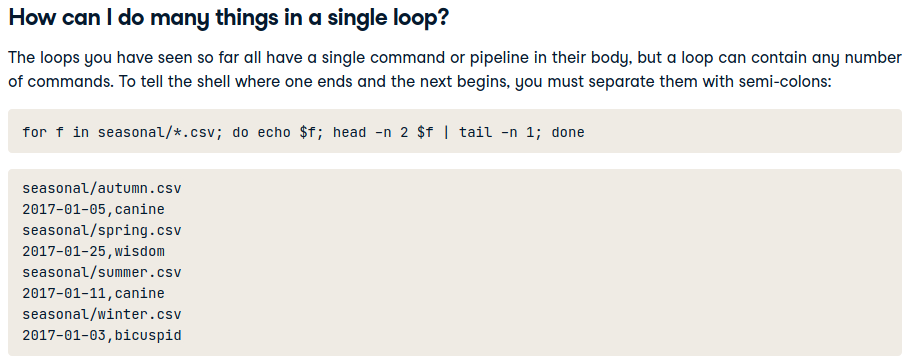

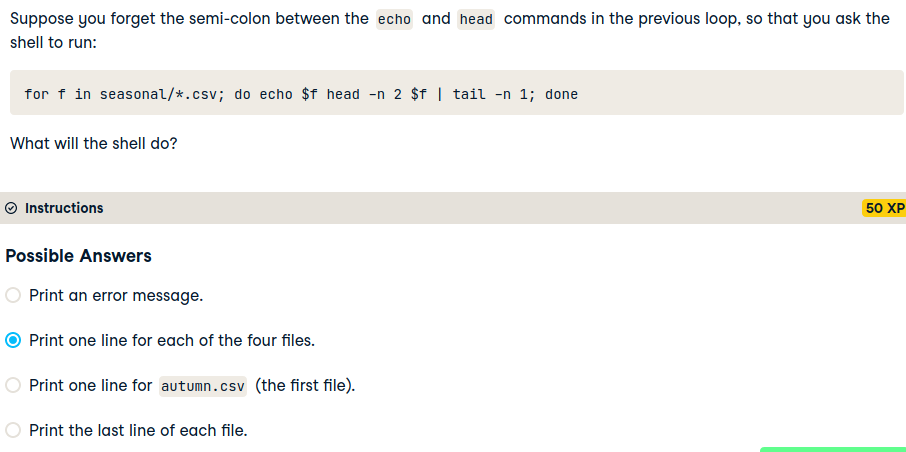

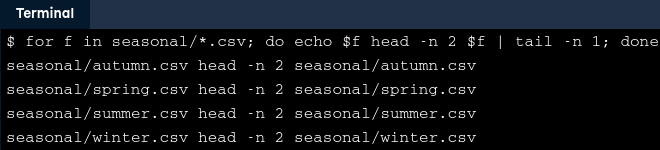

echo produces one line that includes the filename twice, which tail then copies.